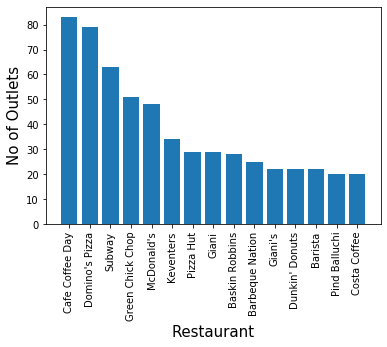

In [8]:
"""
Plot the bar graph top 15 restaurants have a maximum number of outlets.

Answer: Here I have considered only Indian Restaurants as it has been mentioned on the top of Questions. Here I have
filtered out only Indian Restaurnats first by using boolean indexing. Once that's done I have made one dictionary in 
which I stored the outlet name and made it as key and frequency as the value. After iterating over all the names
I got my dictionary fully prepared for the data visualization but as the we need to print in descending order so I have
used one list of list named restaurant_names_counts which stores the name and the frequencey. After that I have sorted 
the list of list based on the frequency. Note: I have assumed no two rows with same outlet name and locality present
in the dataset. If that would have been considered then I would have need to filtered out those if already appeared. 
"""

# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
zomato_df =  pd.read_csv("zomato_utf.csv")
# Only Indian Restaurants
zomato_india_df = zomato_df[zomato_df['Country Code']==1]

restaurants_outlet_count = {}

def count_outlets(name):
    restaurants_outlet_count[name] = restaurants_outlet_count.get(name,0)+1
zomato_india_df['Restaurant Name'].apply(count_outlets)

restaurant_names_counts = [ [value,key] for key,value in restaurants_outlet_count.items()]
restaurant_names_counts.sort(reverse=True)
restaurants_name = [ i[1] for i in restaurant_names_counts][:15]
counts = [ i[0] for i in restaurant_names_counts][:15]
plt.bar(restaurants_name,counts)
plt.xticks(rotation=90)
plt.xlabel("Restaurant", size=15)
plt.ylabel("No of Outlets",size = 15)
plt.show()


